In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import pandas as pd

df = pd.read_csv("PROJECT_training2005/ufz_qc_challenge/00_data.csv", delimiter=" ")


In [3]:
df.head()

,,Time,Box,Date.Time,SM1,SM1_Flag,Temp1,Temp1_Flag,SM2,SM2_Flag,Temp2,...,SM6_Flag,Temp6,Temp6_Flag,BattV,SM1_Depth,SM2_Depth,SM3_Depth,SM4_Depth,SM5_Depth,SM6_Depth
1.2,2012-07-19,17:45:53,1,2012-07-19 17:45:53,-2.8240,Auto:Range,18.2580,OK,-5.9817,Auto:Range,18.2232,...,Auto:Range,18.3623,OK,3599,0.05,0.05,0.05,0.05,0.05,0.05
2.2,2010-10-03,02:07:00,2,2010-10-03 02:07:00,29.9656,OK,5.0416,OK,-4.8066,Auto:Range,-15.1656,...,OK,5.7372,OK,3138,0.10,0.20,0.30,0.40,0.50,0.60
2.3,2010-10-03,03:07:00,2,2010-10-03 03:07:00,26.1448,OK,8.4848,OK,23.7972,OK,7.7544,...,Auto:Spike,6.8154,OK,3496,0.10,0.20,0.30,0.40,0.50,0.60
2.4,2010-10-06,05:08:00,2,2010-10-06 05:08:00,29.7645,OK,4.9373,OK,-4.7984,Auto:Range,-15.1656,...,OK,5.7024,OK,3198,0.10,0.20,0.30,0.40,0.50,0.60
2.5,2010-10-10,04:09:00,2,2010-10-10 04:09:00,29.9037,OK,5.0764,OK,-4.8066,Auto:Range,-15.1656,...,OK,5.7720,OK,3209,0.10,0.20,0.30,0.40,0.50,0.60


In [4]:
df.keys()

Index(['Time', 'Box', 'Date.Time', 'SM1', 'SM1_Flag', 'Temp1', 'Temp1_Flag',
       'SM2', 'SM2_Flag', 'Temp2', 'Temp2_Flag', 'SM3', 'SM3_Flag', 'Temp3',
       'Temp3_Flag', 'SM4', 'SM4_Flag', 'Temp4', 'Temp4_Flag', 'SM5',
       'SM5_Flag', 'Temp5', 'Temp5_Flag', 'SM6', 'SM6_Flag', 'Temp6',
       'Temp6_Flag', 'BattV', 'SM1_Depth', 'SM2_Depth', 'SM3_Depth',
       'SM4_Depth', 'SM5_Depth', 'SM6_Depth'],
      dtype='object')

In [5]:
df["SM1_Flag"]

1.200000   2012-07-19    Auto:Range
2.200000   2010-10-03            OK
2.300000   2010-10-03            OK
2.400000   2010-10-06            OK
2.500000   2010-10-10            OK
                            ...    
40.415356  2019-05-12    Auto:Range
40.415357  2019-05-12    Auto:Range
40.415358  2019-05-12    Auto:Range
40.415359  2019-05-12    Auto:Range
40.415360  2019-05-12    Auto:Range
Name: SM1_Flag, Length: 6643366, dtype: object

In [6]:
df["SM1"].head()

1.2  2012-07-19    -2.8240
2.2  2010-10-03    29.9656
2.3  2010-10-03    26.1448
2.4  2010-10-06    29.7645
2.5  2010-10-10    29.9037
Name: SM1, dtype: float64

In [7]:
df["Box"].head()

1.2  2012-07-19    1
2.2  2010-10-03    2
2.3  2010-10-03    2
2.4  2010-10-06    2
2.5  2010-10-10    2
Name: Box, dtype: int64

In [8]:
df["SM1"].head()

1.2  2012-07-19    -2.8240
2.2  2010-10-03    29.9656
2.3  2010-10-03    26.1448
2.4  2010-10-06    29.7645
2.5  2010-10-10    29.9037
Name: SM1, dtype: float64

In [9]:
df[df["Box"] == 2].head()

,,Time,Box,Date.Time,SM1,SM1_Flag,Temp1,Temp1_Flag,SM2,SM2_Flag,Temp2,...,SM6_Flag,Temp6,Temp6_Flag,BattV,SM1_Depth,SM2_Depth,SM3_Depth,SM4_Depth,SM5_Depth,SM6_Depth
2.2,2010-10-03,02:07:00,2,2010-10-03 02:07:00,29.9656,OK,5.0416,OK,-4.8066,Auto:Range,-15.1656,...,OK,5.7372,OK,3138,0.1,0.2,0.3,0.4,0.5,0.6
2.3,2010-10-03,03:07:00,2,2010-10-03 03:07:00,26.1448,OK,8.4848,OK,23.7972,OK,7.7544,...,Auto:Spike,6.8154,OK,3496,0.1,0.2,0.3,0.4,0.5,0.6
2.4,2010-10-06,05:08:00,2,2010-10-06 05:08:00,29.7645,OK,4.9373,OK,-4.7984,Auto:Range,-15.1656,...,OK,5.7024,OK,3198,0.1,0.2,0.3,0.4,0.5,0.6
2.5,2010-10-10,04:09:00,2,2010-10-10 04:09:00,29.9037,OK,5.0764,OK,-4.8066,Auto:Range,-15.1656,...,OK,5.7720,OK,3209,0.1,0.2,0.3,0.4,0.5,0.6
2.6,2010-10-13,07:09:00,2,2010-10-13 07:09:00,30.2419,OK,5.2503,OK,-4.8148,Auto:Range,-15.1656,...,OK,5.7372,OK,3202,0.1,0.2,0.3,0.4,0.5,0.6


In [10]:
data = {}
for i in range(40):
    data[i] = df[df["Box"] == i + 1]

In [11]:
from matplotlib import pyplot as plt

In [12]:
data[0].head()

,,Time,Box,Date.Time,SM1,SM1_Flag,Temp1,Temp1_Flag,SM2,SM2_Flag,Temp2,...,SM6_Flag,Temp6,Temp6_Flag,BattV,SM1_Depth,SM2_Depth,SM3_Depth,SM4_Depth,SM5_Depth,SM6_Depth
1.2,2012-07-19,17:45:53,1,2012-07-19 17:45:53,-2.824,Auto:Range,18.258,OK,-5.9817,Auto:Range,18.2232,...,Auto:Range,18.3623,OK,3599,0.05,0.05,0.05,0.05,0.05,0.05


In [13]:
"""for j in range(39):
    for i in range(6):
        data[j + 1]["SM" + str(i + 1)].plot(ylim=(0, 100), alpha=0.5)
    print(j+2)
    #data[j + 1]["BattV"].plot()
    plt.show()
    plt.close()"""

'for j in range(39):\n    for i in range(6):\n        data[j + 1]["SM" + str(i + 1)].plot(ylim=(0, 100), alpha=0.5)\n    print(j+2)\n    #data[j + 1]["BattV"].plot()\n    plt.show()\n    plt.close()'

In [14]:
data[1].cov()

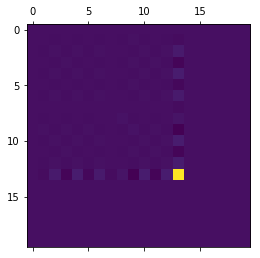

In [46]:
plt.matshow(data[7].cov())

In [16]:
df['Box'].col

Time            86400
Box                40
Date.Time     6542386
SM1            561627
SM1_Flag            5
Temp1            2249
Temp1_Flag          5
SM2            613329
SM2_Flag            5
Temp2            2243
Temp2_Flag          5
SM3            534766
SM3_Flag            5
Temp3            2188
Temp3_Flag          5
SM4            593353
SM4_Flag            5
Temp4            1575
Temp4_Flag          5
SM5            582881
SM5_Flag            5
Temp5            2305
Temp5_Flag          5
SM6            551559
SM6_Flag            5
Temp6            2319
Temp6_Flag          5
BattV            1355
SM1_Depth           4
SM2_Depth           4
SM3_Depth           5
SM4_Depth           5
SM5_Depth           6
SM6_Depth           5
dtype: int64

In [17]:
small = df.groupby(['Box']).size()

In [18]:
small

Box
1          1
2     115670
3     115472
4     260622
5      42935
6     234904
7     256195
8      47993
9      32307
10    116219
11     92369
12    149171
13    263365
14    126297
15    248344
16    133819
17    135978
18    107490
19     44738
20    141011
21    151228
22    124671
23    165536
24    198361
25    159180
26    266314
27    247723
28    141728
29    251347
30    113021
31    150212
32    158972
33     86336
34    263279
35    239461
36    271042
37    244651
38    259019
39    250223
40    236162
dtype: int64

In [19]:
for p in small.keys():
    print(p)
l = list(filter(lambda x: small[x] > 100, small.keys()))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [20]:
l

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [21]:
df3 = df[df['Box'].isin(l)]
df3.head()

,,Time,Box,Date.Time,SM1,SM1_Flag,Temp1,Temp1_Flag,SM2,SM2_Flag,Temp2,...,SM6_Flag,Temp6,Temp6_Flag,BattV,SM1_Depth,SM2_Depth,SM3_Depth,SM4_Depth,SM5_Depth,SM6_Depth
2.2,2010-10-03,02:07:00,2,2010-10-03 02:07:00,29.9656,OK,5.0416,OK,-4.8066,Auto:Range,-15.1656,...,OK,5.7372,OK,3138,0.1,0.2,0.3,0.4,0.5,0.6
2.3,2010-10-03,03:07:00,2,2010-10-03 03:07:00,26.1448,OK,8.4848,OK,23.7972,OK,7.7544,...,Auto:Spike,6.8154,OK,3496,0.1,0.2,0.3,0.4,0.5,0.6
2.4,2010-10-06,05:08:00,2,2010-10-06 05:08:00,29.7645,OK,4.9373,OK,-4.7984,Auto:Range,-15.1656,...,OK,5.7024,OK,3198,0.1,0.2,0.3,0.4,0.5,0.6
2.5,2010-10-10,04:09:00,2,2010-10-10 04:09:00,29.9037,OK,5.0764,OK,-4.8066,Auto:Range,-15.1656,...,OK,5.7720,OK,3209,0.1,0.2,0.3,0.4,0.5,0.6
2.6,2010-10-13,07:09:00,2,2010-10-13 07:09:00,30.2419,OK,5.2503,OK,-4.8148,Auto:Range,-15.1656,...,OK,5.7372,OK,3202,0.1,0.2,0.3,0.4,0.5,0.6


In [38]:
from QueryBuilder import QueryBuilder

qb = QueryBuilder("PROJECT_training2005/ufz_qc_challenge/00_data.csv") \
    .remove_small() \
    .replace_nan()
qbdf = qb.df

/p/software/jusuf/stages/Devel-2019a/software/Jupyter/2019a.2.3-gcccoremkl-8.3.0-2019.3.199-Python-3.6.8/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


In [35]:
qbdf.head()

,,Time,Box,Date.Time,SM1,SM1_Flag,Temp1,Temp1_Flag,SM2,SM2_Flag,Temp2,...,SM6_Flag,Temp6,Temp6_Flag,BattV,SM1_Depth,SM2_Depth,SM3_Depth,SM4_Depth,SM5_Depth,SM6_Depth
2.2,2010-10-03,02:07:00,2,2010-10-03 02:07:00,29.9656,OK,5.0416,OK,NaN,Auto:Range,-15.1656,...,OK,5.7372,OK,3138,0.1,0.2,0.3,0.4,0.5,0.6
2.3,2010-10-03,03:07:00,2,2010-10-03 03:07:00,26.1448,OK,8.4848,OK,23.7972,OK,7.7544,...,Auto:Spike,6.8154,OK,3496,0.1,0.2,0.3,0.4,0.5,0.6
2.4,2010-10-06,05:08:00,2,2010-10-06 05:08:00,29.7645,OK,4.9373,OK,NaN,Auto:Range,-15.1656,...,OK,5.7024,OK,3198,0.1,0.2,0.3,0.4,0.5,0.6
2.5,2010-10-10,04:09:00,2,2010-10-10 04:09:00,29.9037,OK,5.0764,OK,NaN,Auto:Range,-15.1656,...,OK,5.7720,OK,3209,0.1,0.2,0.3,0.4,0.5,0.6
2.6,2010-10-13,07:09:00,2,2010-10-13 07:09:00,30.2419,OK,5.2503,OK,NaN,Auto:Range,-15.1656,...,OK,5.7372,OK,3202,0.1,0.2,0.3,0.4,0.5,0.6


In [36]:
data = {}
for i in range(39):
    data[i] = qbdf[qbdf["Box"] == i + 1]

2


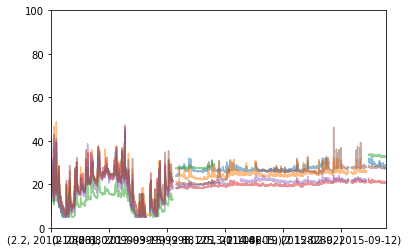

3


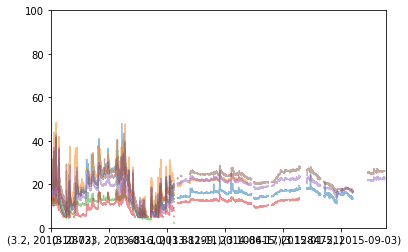

4


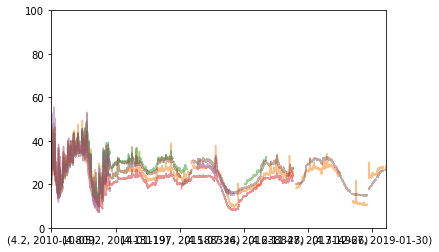

In [37]:
for j in range(3):
    for i in range(6):
        data[j + 1]["SM" + str(i + 1)].plot(ylim=(0, 100), alpha=0.5)
    print(j+2)
    #data[j + 1]["BattV"].plot()
    plt.show()
    plt.close()

In [40]:
qb.normalize_timestamps()

2010-09-30 02:07:00 2019-05-12 08:41:40



Please wait a moment while I gather a list of all available modules...



/p/software/jusuf/stages/Devel-2019a/software/Jupyter/2019a.2.3-gcccoremkl-8.3.0-2019.3.199-Python-3.6.8/lib/python3.6/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/p/software/jusuf/stages/Devel-2019a/software/Jupyter/2019a.2.3-gcccoremkl-8.3.0-2019.3.199-Python-3.6.8/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-d709e63e2cb7>", line 1, in <module>
    help('modules')
  File "/p/software/jusuf/stages/Devel-2019a/software/Python/3.6.8-GCCcore-8.3.0/lib/python3.6/_sitebuiltins.py", line 103, in __call__
    return pydoc.help(*args, **kwds)
  File "/p/software/jusuf/stages/Devel-2019a/software/Python/3.6.8-GCCcore-8.3.0/lib/python3.6/pydoc.py", line 1857, in __call__
    self.help(request)
  File "/p/software/jusuf/stages/Devel-2019a/software/Python/3.6.8-GCCcore-8.3.0/lib/python3.6/pydoc.py", line 1904, in help
    elif request == 'modules': self.listmodules()
  File "/p/software/jusuf/stages/Devel-2019a/software/Python/3.6.8-GCCcore-8.3.0/lib/python3.6/pydoc.py", line 2056, in listmodules

KeyboardInterrupt: 